In [126]:

import pandas as pd 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
import re



In [127]:
import nltk 

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))




In [128]:
data = pd.read_csv('D:/flipkart review analysis/flipkart_data.csv') 
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [129]:
# unique ratings 
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

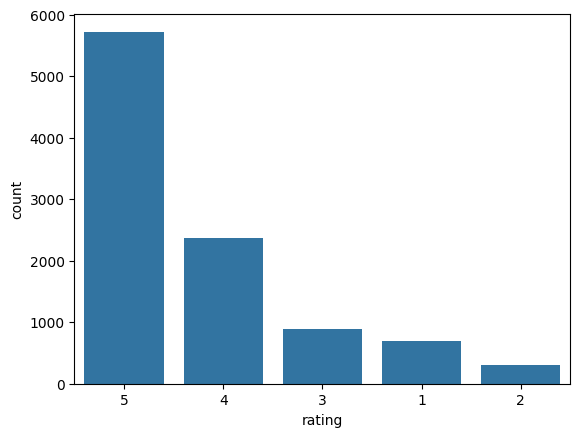

In [130]:
sns.countplot(data=data, 
			x='rating', 
			order=data.rating.value_counts().index)


In [131]:
# rating label(final) 
pos_neg = [] 
for i in range(len(data['rating'])): 
	if data['rating'][i] >= 5: 
		pos_neg.append(1) 
	else: 
		pos_neg.append(0) 

data['label'] = pos_neg 


In [132]:


def wordopt(review):
    # Convert to lowercase
    review = review.lower()

   

    # Remove punctuation
    review = re.sub(r'[^\w\s]', '', review)
    review = ' '.join(word for word in review.split() if word not in stop_words)


    # Remove newline characters
    review = re.sub(r'\n', '', review)

    return review


In [133]:
data['review'] = data['review'].apply(wordopt)

In [134]:
data.head()


,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [135]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

In [136]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()


In [137]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
													test_size=0.33, 
													stratify=data['label'], 
													random_state = 42)


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score




model = DecisionTreeClassifier(random_state=0)


model.fit(X_train, y_train)

pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9241358671255424


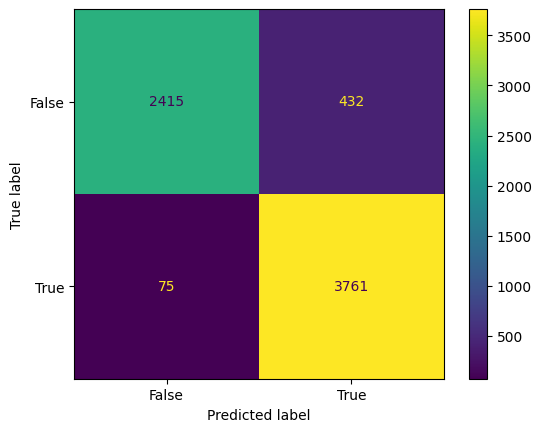

In [139]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()
